# Introduction to `cartopy`

In this notebook, we will explore how we can use `cartopy` to create beautiful maps in python. Although we have already discussed mapping using GIS-like python tools in several workshop videos, `cartopy` offers a different approach to mapping array data.

We will work through some simple examples from Ryan Abernathey's [Earth and Environmental Data Science jupyterbook](https://earth-env-data-science.github.io/lectures/mapping_cartopy.html).

In `cartopy`, each projection is a class. 

## Drawing a Simple Map

Let's start by drawing a common [Plate Carree projection](https://pro.arcgis.com/en/pro-app/2.8/help/mapping/properties/plate-carree.htm#:~:text=The%20plate%20carr%C3%A9e%20map%20projection,and%20from%20pole%20to%20pole.). To do this, we need to import `cartopy's` `crs` module:

In [29]:
# import packages
import cartopy.crs as ccrs # ccrs = cartopy coordinate reference system
import cartopy
from matplotlib import pyplot as plt

Cartopy can interface with matplotlib, and each projection knows how to represent itself by creating a matplotlib Axes (or AxesSubplot).

The Axes that the projection creates is a `cartopy.mpl.geoaxes.GeoAxes` instance. This Axes subclass overrides some of matplotlib’s existing methods, and adds a number of extremely useful ones for drawing maps.

We’ll take a look at some of these methods below, but first, let’s see how cartopy+matplotlib works:

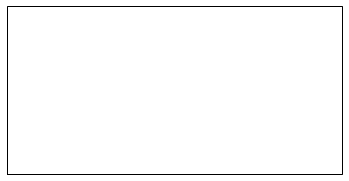

In [30]:
# define projection
proj = ccrs.PlateCarree()

# plot using matplotlib interface
plt.figure()
plt.axes(projection=proj)
plt.show()

So far we haven't projected any data, we have only setup the projection and plotted the Axes.

We can use one of the most useful methods of the `GeoAxes` subclass to add coastline data to our map using the [Natural Earth dataset](https://www.naturalearthdata.com/)

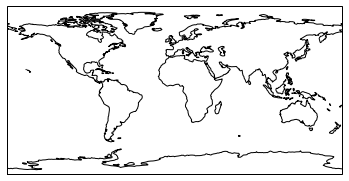

In [31]:
# plot using matplotlib interface
plt.figure()
ax = plt.axes(projection=proj)
ax.coastlines()
plt.show()

There are lots of ways to customize your map projection and you can explore some of these options in the `cartopy` documentation. 

Here is one example of how you can customize: you can change the central longitude of your projection.

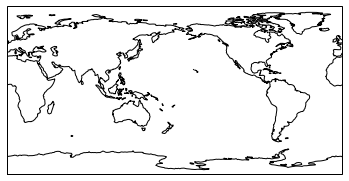

In [32]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()
plt.show()

### Useful methods of `GeoAxes`
The [`cartopy.mpl.geoaxes.GeoAxes`](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes) subclass adds a number of useful methods, including but not limited to:

[set_global](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global) - zoom the map out as much as possible

[set_extent](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent) - zoom the map to the given bounding box

[gridlines](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.gridlines) - add gridlines (and optionally labels) to the axes

[coastlines](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.coastlines) - add Natural Earth coastlines to the axes

[stock_img](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img) - add a low-resolution Natural Earth background image to the axes

[background_img](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html?highlight=img#cartopy.mpl.geoaxes.GeoAxes.background_img) - add an image from a selection of pre-prepared images to the axes

[add_geometries](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_geometries) - add a collection of geometries (Shapely) to the axes

### Example of Methods: Regional Maps

We can plot maps of a particular region using the `.set_extent()` method. Here's an example for North America:

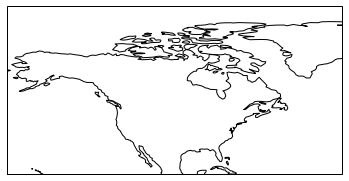

In [47]:
# using .set_extent for North America
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-170,-30,20,90]) # [longitude pair, latitude pair]
plt.show()

Finally, here are a few examples of different global projections using the `.stock_img()` method to add a shaded Natural Earth background.

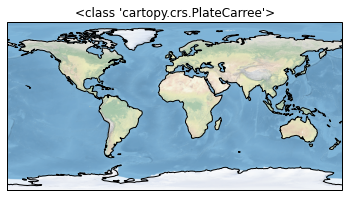

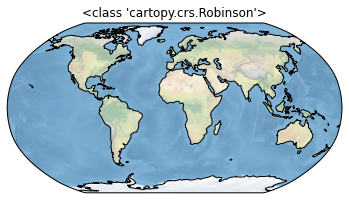

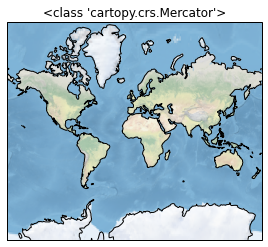

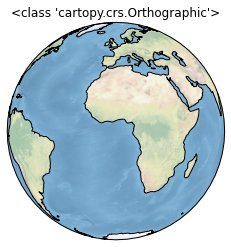

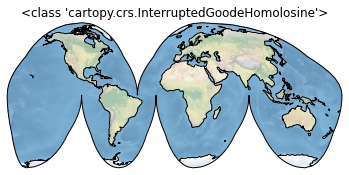

In [45]:
# define projections
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]

# plot projections
for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

### Adding Features to a Map

You can provide your map with more geographical detail, such as country borders, lakes rivers, etc. using [`cartopy.feature` objects](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html). 

Let's take a look at an example for Canada:

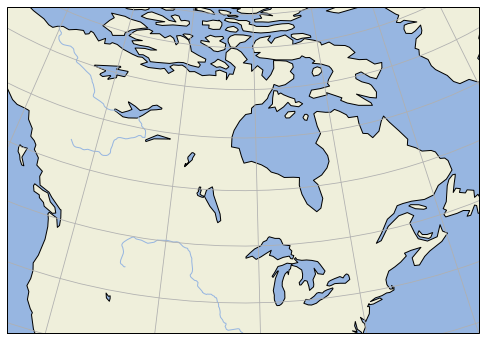

In [74]:
# example of adding features to map
import cartopy.feature as cfeature
import numpy as np

central_lat = 55.5
central_lon = -87.5
extent = [-125, -60, 35, 75.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()
plt.show()

Notice, that we are only resolution the large-scale features. If we want higher-resolution features, `cartopy` can automatically download and create them from the [Natural Earth Data database](https://www.naturalearthdata.com/) or the [GSHHS dataset database](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html).

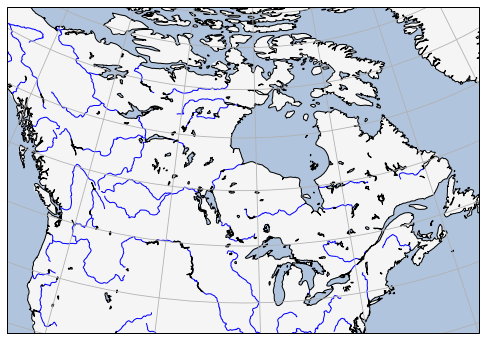

In [79]:
# higher resolution rivers, lakes and land
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
coasts_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN,facecolor='lightsteelblue')
ax.add_feature(coasts_50m, facecolor='whitesmoke',edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.add_feature(lakes_50m, facecolor='lightsteelblue',edgecolor='black')
ax.gridlines()
plt.show()

## Adding Data to a Map

So far, we have been playing around with different methods and features of `cartopy` projections, but we haven't actually plotted any external data. 

To do this the data must be transformed to the projection coordinate system. This is done via the `transform=` keyword in the plotting method. The argument is another `cartopy.crs` object. If you don’t specify a transform, `cartopy` assumes that the data is in the same coordinate reference system as the projection of the underlying GeoAxis.

Let's take a look at an illustrative example of drawing curves to see better understand this concept:

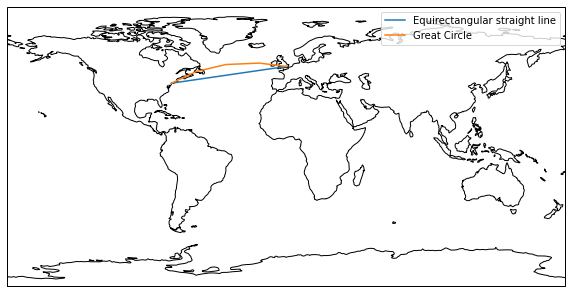

In [143]:
# define projection axes
plt.figure(figsize=(10,20))
ax = plt.axes(projection=ccrs.PlateCarree())

# create some test data - locations of NYC and London
new_york = dict(lon=-74.0060, lat=40.7128)
london = dict(lon=0.1276, lat=51.5072)
lons = [new_york['lon'], london['lon']]
lats = [new_york['lat'], london['lat']]

# make line plots
ax.plot(lons, lats, label='Equirectangular straight line') # default (assumes same crs)
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic()) # specify a transformation from geodetic to platecarree
ax.coastlines()
ax.legend()
ax.set_global()
plt.show()

### Plotting 2-D Array Data

Now, let's look at an example of plotting 2-D array data. Below we will create some example data defined in regular lat / lon coordinates, corresponding to the *PlateCarree* coordinate reference system.

In [ ]:
# define coordinates
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

# generate data
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

Let's first plot this using matplotlib to see what it looks like:

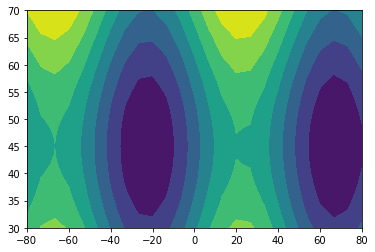

In [145]:
# plot using matplotlib
plt.contourf(lon2d, lat2d, data)

Alternatively, let's plot this data on a map. We will create a *PlateCarree* projection. We can plot the data on the GeoAxes without any `transform=` keyword because the data are already in the same coordinate reference system. 

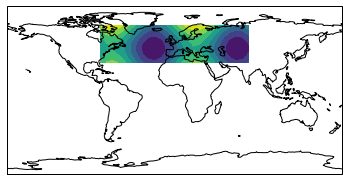

In [147]:
# define projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

# plot data
ax.contourf(lon, lat, data)

If we want to plot the data in a different coordinate reference system, we will need to transform the data. Let's try this:

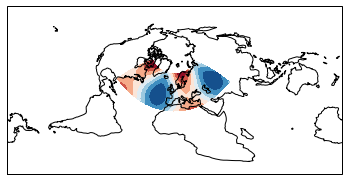

In [152]:
# define projection
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# plot data -> use the transform argument to specify the crs of the data
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(),cmap='RdBu_r')

### Plotting Images

We can plot a satellite image easily on a map ***if we know its extent***.

Let's grab one of Hurrican Mariam of 2012 from the NASA imagery gallery.

**Note:** Don't run the below cell if you do not feel comfortable downloading with a certificate check.

In [139]:
! wget --no-check-certificate https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg

--2022-03-30 21:54:02--  https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg
Resolving lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)... 198.118.194.28
Connecting to lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)|198.118.194.28|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lance.modaps.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg [following]
--2022-03-30 21:54:02--  https://lance.modaps.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg
Resolving lance.modaps.eosdis.nasa.gov (lance.modaps.eosdis.nasa.gov)... 198.118.194.28
Connecting to lance.modaps.eosdis.nasa.gov (lance.modaps.eosdis.nasa.gov)|198.118.194.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256220 (250K) [image/jpeg]
Saving to: ‘Miriam.A2012270.2050.2km.jpg’

Miriam.A2012270.205 100%[===================>] 250.21K  --.-KB/s    i

Text(-117, 33, 'San Diego')

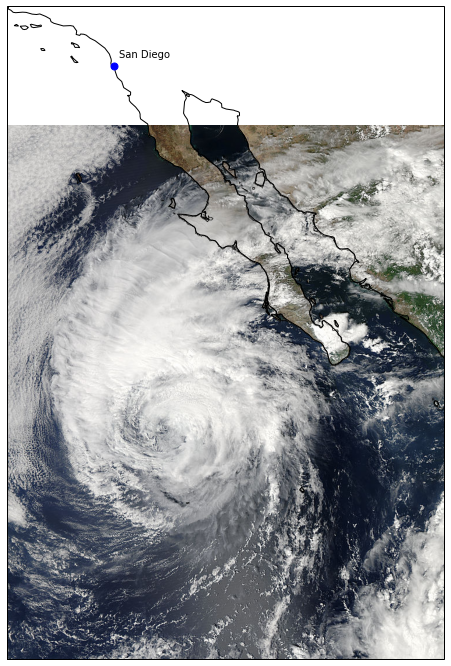

In [141]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

### `cartopy` + `xarray`

`cartopy` transforms can be passed to `xarray`! This creates a very quick path for creating professional looking maps from netCDF data.

Let's take a look at how this works using the [NOAA Extended Reconstructed Sea Surface Temperature (ERSST) v5 product](https://www.ncei.noaa.gov/products/extended-reconstructed-sst) that we used in a previous notebook.

Since the data is provided via an OPeNDAP server, we can load it directly without downloading anything:

In [156]:
# import xarray
import xarray as xr

# load data
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1961', '2020'))
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 720)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1961-01-01 1961-02-01 ... 2020-12-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/38)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2022-03-07
    DODS_EXTRA.Unlimited_Dimension:  time

This is 3-D data, so we will need to reduce it to plot it on a 2-D map. Let's take the time mean:

In [160]:
# take time mean
sst = ds.sst.mean('time')

Note that the sst data is in the *PlateCarree* coordinate reference system. But, let's plot the data on a *Robinson* projection. We can pass the `transform=` argument to the built-in `xarray` plotting functions.

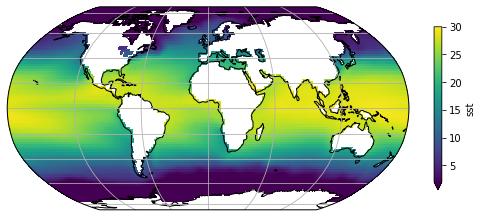

In [159]:
# plot sst data
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=2, vmax=30, cbar_kwargs={'shrink': 0.5})

Cool!